In [1]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.optimize import curve_fit
from xhistogram.xarray import histogram

from dask.distributed import Client

%matplotlib inline

In [2]:
client = Client(n_workers=8)
display(client)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 8,Total memory: 80.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40391,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 80.00 GiB
Comm: tcp://127.0.0.1:38617,Total threads: 1
Dashboard: /proxy/33231/status,Memory: 10.00 GiB
Nanny: tcp://127.0.0.1:39753,


In [3]:
### Generate new session

db = '/scratch/e14/mp2135/access-om2/archive/databases/1deg_jra55_ryf_experiments_abrupt_spinup500.db'
session = cc.database.create_session(db)
# cc.querying.get_experiments(session, all=True)

In [29]:
expt = '1deg_jra55_ryf_cont'
salt_cont = xr.open_mfdataset(paths=f'/scratch/e14/mp2135/access-om2/archive/{expt}/output1*/ocean/ocean-scalar-1-daily-ym_24*', 
                             combine='by_coords').salt_surface_ave.sel(time=slice('2400-01-01', '2449-12-31')).groupby('time.year').mean(dim='time').load()

In [31]:
expt = '1deg_jra55_ryf_cool_x1'
salt_cool = xr.open_mfdataset(paths=f'/scratch/e14/mp2135/access-om2/archive/{expt}/output1*/ocean/ocean-scalar-1-daily-ym_24*', 
                             combine='by_coords').salt_surface_ave.sel(time=slice('2400-01-01', '2449-12-31')).groupby('time.year').mean(dim='time').load()

In [34]:
expt = '1deg_jra55_ryf_warm_x1'
salt_warm = xr.open_mfdataset(paths=f'/scratch/e14/mp2135/access-om2/archive/{expt}/output1*/ocean/ocean-scalar-1-daily-ym_24*', 
                             combine='by_coords').salt_surface_ave.sel(time=slice('2400-01-01', '2449-12-31')).groupby('time.year').mean(dim='time').load()

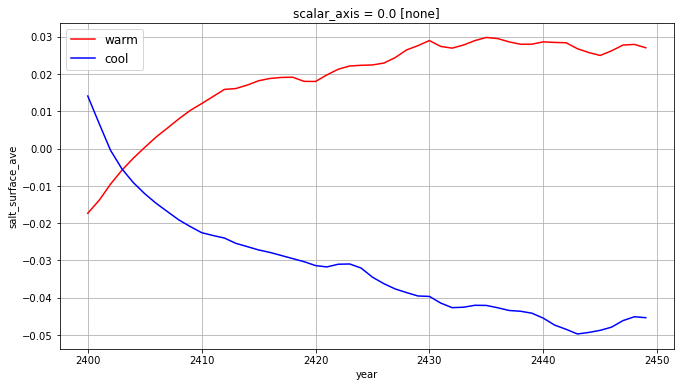

In [43]:
plt.figure(figsize=(11,6))

(salt_warm - salt_cont).plot(color='r',label='warm')
(1*(salt_cool - salt_cont)).plot(color='b',label=r'cool')

fontsize=12
plt.legend(fontsize=fontsize)
plt.grid()
plt.savefig('salt_1deg.pdf', bbox_inches='tight', dpi=300)